<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/230106_%EC%A1%B0%EB%B3%84%EC%8B%A4%EC%8A%B5_bmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#조별실습
##선형 회귀분석을 통해 bmi지수에 영향을 주는 요소들 예측해보기!
##김소현, 고영광, 강효원, 황도영

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split  #'train_test_split': train set과 test set을 나누어줌
from sklearn.model_selection import cross_val_score  #'sklearn'(사이킷런): 머신러닝에서 자주 활용하는 패키지
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#전체데이터 불러오기, 결측값 제거
#범주데이터는 엑셀 내에서 한글->숫자로 변환했음

bd = pd.read_excel("/content/drive/MyDrive/230106_body_data_범주데이터수정.xlsx")
bd
bd.dropna(axis=0, inplace=True)
#X,Y 따로따로 dropna()하지말고 전체데이터에서 dropna()하고 시작하기. 따로따로하면 X,Y 행 수 달라짐🤬
     

In [ ]:
#결측값 제거 확인
bd.isnull().sum()

ⓞ_02_성별             0
ⓞ_06_나이_반올림         0
ⓞ_12_골격근량           0
ⓞ_13_체지방량           0
ⓞ_14_체수분            0
                   ..
①_129_발뒤꿈치너비        0
①_130_위팔둘레          0
①_131_팔꿈치둘레         0
①_132_손목둘레          0
①_133_머리위로뻗은주먹높이    0
Length: 148, dtype: int64

In [ ]:
bd.describe()

,ⓞ_02_성별,ⓞ_06_나이_반올림,ⓞ_12_골격근량,ⓞ_13_체지방량,ⓞ_14_체수분,ⓞ_15_단백질,ⓞ_16_무기질,ⓞ_17_BMI,ⓞ_18_체지방율,ⓞ_19_복부지방율,...,①_124_무릎아래둘레,①_125_장딴지둘레,①_126_종아리최소둘레,①_127_발목최대둘레,①_128_발목너비,①_129_발뒤꿈치너비,①_130_위팔둘레,①_131_팔꿈치둘레,①_132_손목둘레,①_133_머리위로뻗은주먹높이
count,3181.0,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,...,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,1.0,32.786545,21.183842,17.645112,28.749010,7.672902,2.764980,22.583166,30.500912,0.850173,...,329.423137,347.648224,208.037724,233.573090,48.828670,60.367494,263.805407,246.492927,146.693807,1850.907576
std,0.0,15.048434,3.296812,5.881946,3.930124,1.072525,2.632138,3.410798,6.616183,0.106210,...,21.390297,26.454110,12.510467,12.480403,4.535244,3.997066,29.228780,19.569832,9.184684,70.998173
min,1.0,15.000000,3.200000,1.100000,2.900000,1.900000,-125.300000,14.808706,0.900000,0.700000,...,267.000000,273.000000,170.000000,196.000000,8.000000,36.000000,195.000000,199.000000,124.000000,1625.000000
25%,1.0,19.000000,19.300000,13.700000,26.400000,7.000000,2.500000,20.167084,26.400000,0.800000,...,315.000000,330.000000,200.000000,225.000000,46.000000,58.000000,244.000000,233.000000,140.000000,1803.000000
50%,1.0,30.000000,20.900000,17.000000,28.400000,7.600000,2.700000,22.116875,30.600000,0.800000,...,328.000000,345.000000,207.000000,233.000000,49.000000,60.000000,260.000000,244.000000,145.000000,1850.000000
75%,1.0,44.000000,22.700000,20.700000,30.600000,8.200000,2.900000,24.421096,34.300000,0.900000,...,342.000000,364.000000,215.000000,241.000000,52.000000,63.000000,280.000000,257.000000,152.000000,1898.000000
max,1.0,69.000000,101.800000,57.500000,130.000000,34.400000,44.000000,43.277877,152.000000,5.600000,...,443.000000,491.000000,271.000000,345.000000,65.000000,80.000000,425.000000,371.000000,192.000000,2157.000000


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2 

#데이터(변수) 지정
#y= bmi지수 / x= 'bmi지수(y), 키, 몸무게' 제외한 변수들
X = bd.drop(["ⓞ_17_BMI","①_003_키", "①_031_몸무게"], axis=1) 
Y = bd["ⓞ_17_BMI"]


In [ ]:
#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#일변량 통계기반
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

#여기서 True가 나온 변수들을 X값으로 대입

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Chi2,p-value,support,attribute
6,34.445432,2.932552e-31,True,ⓞ_16_무기질
16,25.956213,4.132212e-28,True,①_004_눈높이
17,21.205422,6.997193e-26,True,①_005_목뒤높이
18,17.837833,5.424608e-24,True,①_006_어깨높이
19,21.188711,7.137987e-26,True,①_007_어깨가쪽높이
20,15.220468,2.827920e-22,True,①_008_겨드랑높이
21,8.469902,4.031410e-16,True,①_009_굽힌팔꿈치높이
57,7.697001,3.741583e-15,True,①_046_배돌출점기준엉덩이둘레
63,14.320180,1.277730e-21,True,①_052_총길이
132,7.166672,1.933535e-14,True,①_121_넙다리둘레


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9438 missing from current font.
  font.set_text(s, 0, flags=flags)


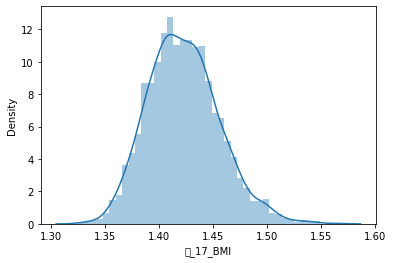

In [ ]:
import seaborn as sns
import numpy as np
     
#y("ⓞ_17_BMI")에 로그적용
bd["ⓞ_17_BMI"] = np.log1p(bd["ⓞ_17_BMI"])
sns.distplot(bd["ⓞ_17_BMI"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

#True값이 나온 변수들 리스트에 넣기
#연속형 변수들만 나옴 -> StandardScaler 적용
num = ["ⓞ_16_무기질", "①_004_눈높이", "①_005_목뒤높이", "①_006_어깨높이", "①_007_어깨가쪽높이", "①_008_겨드랑높이", "①_009_굽힌팔꿈치높이", "①_046_배돌출점기준엉덩이둘레", "①_052_총길이", "①_121_넙다리둘레"] 

X = bd[num]
Y = bd["ⓞ_17_BMI"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#표준화
ct = ColumnTransformer([('scling', StandardScaler(), num)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train)

[[-2.29605999e-01  3.67837789e-01  6.70283342e-02 ... -9.57428845e-01
  -2.98053025e-01 -9.43253866e-01]
 [-7.48435604e-02  3.31226704e-01  7.28733544e-01 ... -1.51554058e-01
   5.63715528e-01 -4.61375182e-01]
 [-2.29605999e-01 -2.91161743e-01 -2.16559613e-01 ... -6.55225800e-01
  -3.36353850e-01 -1.19566651e+00]
 ...
 [ 3.89443756e-01  1.66476821e-01  3.50616281e-01 ...  2.87047639e+00
   6.21166765e-01  3.02650863e+00]
 [-7.48435604e-02 -6.93883679e-01 -4.64068446e-02 ...  3.52117684e-01
   3.72211405e-01  4.33542374e-01]
 [ 2.53765904e-03  9.32546507e-02  5.20769049e-01 ...  5.36797323e-01
   8.50971712e-01 -1.17176122e-01]]


In [ ]:
#선형회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from math import sqrt 

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) 
rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}".format(rmse))

#결과값
#train R2 : 0.843 -> 모델이 평균의 84%정도의 정확도로 설명하고있다. 
#RMSE : 0.014 -> 실제값과 예측된 y의 오차가 0.014이다. (굉장히 작다)

predict value
 [1.43845399 1.43334193 1.41683424 1.45339472 1.39004551 1.47037871
 1.39904115 1.42889364 1.39942737 1.45302293 1.40331544 1.3834941
 1.46147752 1.39275298 1.4547367  1.43810967 1.41004715 1.37434244
 1.43186402 1.44123263 1.43477361 1.40809918 1.3758036  1.39076003
 1.44775113 1.42735618 1.4131308  1.39834701 1.4558337  1.41589099
 1.3667695  1.42885429 1.42358164 1.40950335 1.43058917 1.40242949
 1.47689497 1.41265334 1.45321323 1.4328617  1.42590881 1.42719824
 1.42919258 1.41341651 1.42710348 1.42670298 1.45695076 1.47170275
 1.41545152 1.49697571 1.40853868 1.43275413 1.39037909 1.42969823
 1.41161321 1.43556765 1.38916869 1.39525837 1.47845618 1.37738929
 1.41504873 1.39984482 1.3990867  1.40227508 1.41131988 1.45205219
 1.40049394 1.39268105 1.37192996 1.4251074  1.41522553 1.44441776
 1.44457957 1.46040824 1.40289806 1.41420982 1.43782721 1.37299803
 1.45069387 1.47267052 1.42415027 1.42258656 1.44329268 1.41449734
 1.39910483 1.47427002 1.43401692 1.42916661 1.4

In [ ]:
print("절편", np.round(lr.intercept_, 3)) 
print("가중치(beta)", np.round(lr.coef_, 3))

절편 1.423
가중치(beta) [ 0.001 -0.01  -0.006  0.003  0.022 -0.029  0.004  0.02   0.002  0.007]


In [24]:
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsRegressor

#연속형 자료 model만들기 - KNeighborRegressor()
model = KNeighborsRegressor()

#교차검증(CV)
score = cross_val_score(model, X_train, Y_train, cv = 10)  #'cv=10': train set 내부가 10번으로 나누어져서(쪼개져서) 교차검증
print("교차검증 점수 :", score)


교차검증 점수 : [0.8369778  0.73864386 0.8251348  0.7905285  0.78745336 0.76896538
 0.76428815 0.85512225 0.80854971 0.78753961]


In [25]:
#그리드 서치
from sklearn.model_selection import GridSearchCV

#그리드 인자 검색
mylist = list(range(1,50))
k_list = [x for x in mylist if x%2 != 0] #홀수만 k_list안에 넣어라(임의로 설정) / 짝수로도 가능; 'if x%2 == 0'
parameter_grid = {"n_neighbors": k_list} #딕셔너리 -> 키: 'n_neighbors', 값: k_list

#그리드 서치
grid_search = GridSearchCV(model, parameter_grid, cv = 10) 
grid_search.fit(X_train, Y_train)

grid_search.best_params_

#결과값
#cv=10 일때, best hyper-parameter(k)=11이다. 

{'n_neighbors': 11}

In [27]:
grid_search = GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00314357, 0.00288527, 0.00310345, 0.00294383, 0.00286019,
        0.00284073, 0.0028995 , 0.00309207, 0.00319002, 0.0032037 ,
        0.00293941, 0.00302181, 0.00308492, 0.00336814, 0.00561845,
        0.00616984, 0.00603113, 0.00484343, 0.00710449, 0.00450792,
        0.00420792, 0.00433557, 0.00748308, 0.00509641, 0.00577035]),
 'std_fit_time': array([4.45669996e-04, 5.44270557e-05, 1.82606774e-04, 9.66834844e-05,
        1.02687092e-04, 7.43130823e-05, 1.81868724e-04, 2.74188818e-04,
        5.03288276e-04, 4.02310538e-04, 8.98585550e-05, 1.82722207e-04,
        1.08045894e-04, 6.22704893e-04, 2.74566987e-03, 4.79253141e-03,
        3.70219239e-03, 1.08097053e-03, 4.20541082e-03, 1.02384451e-03,
        4.72936472e-04, 1.47529828e-04, 5.30043290e-03, 2.14282021e-03,
        2.08460492e-03]),
 'mean_score_time': array([0.00520163, 0.00470638, 0.00552456, 0.00540869, 0.00561907,
        0.00568218, 0.00635612, 0.00723698, 0.00707414, 0.00737932,
        0.00